# Measures branching in C++ from python

This notebooks looks into a couple of ways to write code, which one is efficient, which one is not when it comes to write fast and short loops. Both experiments are around [branching](https://en.wikipedia.org/wiki/Branch_predictor). The notebook relies on C++ code implemented in [cbenchmark.cpp](https://github.com/sdpython/cpyquickhelper/blob/master/src/cpyquickhelper/numbers/cbenchmark.cpp) and
[repeat_fct.h](https://github.com/sdpython/cpyquickhelper/blob/master/src/cpyquickhelper/numbers/repeat_fct.h).

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## First experiment: comparison C++ syntax

This all started with article [Why is it faster to process a sorted array than an unsorted array?](https://stackoverflow.com/questions/11227809/why-is-it-faster-to-process-a-sorted-array-than-an-unsorted-array/11227902#11227902). It compares different implementation fo the following function for which we try different implementations for the third line in next cell. The last option is taken
[Checking whether a number is positive or negative using bitwise operators](https://stackoverflow.com/questions/3779202/checking-whether-a-number-is-positive-or-negative-using-bitwise-operators) which avoids [branching](https://en.wikipedia.org/wiki/Branch_predictor).

In [3]:
# int nb = 0;
# for(auto it = values.begin(); it != values.end(); ++it)
#     if (*it >= th) nb++; // this line changes
#     if (*it >= th) nb++; // and is repeated 10 times inside the loop.
#     // ... 10 times
# return nb;

The third line is also repeated 10 times to avoid the loop being too significant. 

In [4]:
from cpyquickhelper.numbers.cbenchmark import measure_scenario_A, measure_scenario_B
from cpyquickhelper.numbers.cbenchmark import measure_scenario_C, measure_scenario_D
from cpyquickhelper.numbers.cbenchmark import measure_scenario_E, measure_scenario_F
from cpyquickhelper.numbers.cbenchmark import measure_scenario_G, measure_scenario_H
from cpyquickhelper.numbers.cbenchmark import measure_scenario_I, measure_scenario_J

In [5]:
import pandas

def test_benchmark(label, values, th, repeat=10, number=20):
    funcs = [(k, v) for k, v in globals().copy().items() if k.startswith("measure_scenario")]
    rows = []
    for k, v in funcs:
        exe = v(values, th, repeat, number)
        d = exe.todict()
        d['doc'] = v.__doc__.split('``')[1]
        d['label'] = label
        d['name'] = k
        rows.append(d)        
    df = pandas.DataFrame(rows)
    return df

test_benchmark("sorted", list(range(10)), 5)

,average,deviation,doc,label,max_exec,min_exec,name,number,repeat
0,1.125950e-06,1.133205e-06,if (values[i] >= th) ++nb;,sorted,2.371000e-06,1.975000e-06,measure_scenario_A,20.0,10.0
1,1.125900e-06,1.133168e-06,if (*it >= th) ++nb;,sorted,2.371000e-06,1.975000e-06,measure_scenario_B,20.0,10.0
2,1.600000e-06,3.800602e-06,if (*it >= th) nb++;,sorted,1.777800e-05,1.185000e-06,measure_scenario_C,20.0,10.0
3,1.777500e-07,2.328491e-07,nb += *it >= th ? 1 : 0;,sorted,7.900000e-07,0.000000e+00,measure_scenario_D,20.0,10.0
4,1.086450e-06,1.095371e-06,if (*it >= th) nb += 1;,sorted,2.371000e-06,1.975000e-06,measure_scenario_E,20.0,10.0
5,2.370500e-07,2.620436e-07,nb += (*it - th) >= 0 ? 1 : 0;,sorted,7.900000e-07,3.950000e-07,measure_scenario_F,20.0,10.0
6,2.173000e-07,2.329721e-07,nb += (*it - th) < 0 ? 1 : 0;,sorted,7.910000e-07,3.950000e-07,measure_scenario_G,20.0,10.0
7,1.975000e-07,2.336852e-07,nb += *it < th ? 1 : 0;,sorted,7.900000e-07,0.000000e+00,measure_scenario_H,20.0,10.0
8,2.173000e-07,2.328873e-07,nb += 1 ^ ((unsigned int)(*it) >> (sizeof(int)...,sorted,7.900000e-07,3.950000e-07,measure_scenario_I,20.0,10.0
9,2.173000e-07,2.328873e-07,nb += values[i] >= th ? 1 : 0;,sorted,7.900000e-07,3.950000e-07,measure_scenario_J,20.0,10.0


Times are not very conclusive on such small lists.

In [6]:
values = list(range(100000))
df_sorted = test_benchmark("sorted", values, len(values)//2, repeat=200)
df_sorted

,average,deviation,doc,label,max_exec,min_exec,name,number,repeat
0,0.245628,NaN,if (values[i] >= th) ++nb;,sorted,0.048667,0.016313,measure_scenario_A,20.0,200.0
1,0.231547,NaN,if (*it >= th) ++nb;,sorted,0.045746,0.013856,measure_scenario_B,20.0,200.0
2,0.237879,NaN,if (*it >= th) nb++;,sorted,0.040912,0.015055,measure_scenario_C,20.0,200.0
3,0.018371,NaN,nb += *it >= th ? 1 : 0;,sorted,0.002249,0.001059,measure_scenario_D,20.0,200.0
4,0.235990,NaN,if (*it >= th) nb += 1;,sorted,0.035320,0.016932,measure_scenario_E,20.0,200.0
5,0.032119,NaN,nb += (*it - th) >= 0 ? 1 : 0;,sorted,0.007510,0.001652,measure_scenario_F,20.0,200.0
6,0.027411,NaN,nb += (*it - th) < 0 ? 1 : 0;,sorted,0.004640,0.001552,measure_scenario_G,20.0,200.0
7,0.017895,NaN,nb += *it < th ? 1 : 0;,sorted,0.003063,0.001010,measure_scenario_H,20.0,200.0
8,0.025926,NaN,nb += 1 ^ ((unsigned int)(*it) >> (sizeof(int)...,sorted,0.004468,0.001515,measure_scenario_I,20.0,200.0
9,0.030522,NaN,nb += values[i] >= th ? 1 : 0;,sorted,0.012621,0.001437,measure_scenario_J,20.0,200.0


The article some implementations will be slower if the values are not sorted.

In [7]:
import random
random.shuffle(values)
values[:10]

[79765, 80470, 74703, 98166, 5342, 49586, 80814, 59363, 24949, 8325]

In [8]:
df_shuffled = test_benchmark("shuffled", values, len(values)//2, repeat=200)
df_shuffled

,average,deviation,doc,label,max_exec,min_exec,name,number,repeat
0,0.230413,NaN,if (values[i] >= th) ++nb;,shuffled,0.049017,0.013496,measure_scenario_A,20.0,200.0
1,0.220849,NaN,if (*it >= th) ++nb;,shuffled,0.041325,0.013957,measure_scenario_B,20.0,200.0
2,0.239806,NaN,if (*it >= th) nb++;,shuffled,0.042383,0.014654,measure_scenario_C,20.0,200.0
3,0.019102,NaN,nb += *it >= th ? 1 : 0;,shuffled,0.002893,0.001016,measure_scenario_D,20.0,200.0
4,0.226775,NaN,if (*it >= th) nb += 1;,shuffled,0.040049,0.014547,measure_scenario_E,20.0,200.0
5,0.029963,NaN,nb += (*it - th) >= 0 ? 1 : 0;,shuffled,0.007140,0.001510,measure_scenario_F,20.0,200.0
6,0.025294,NaN,nb += (*it - th) < 0 ? 1 : 0;,shuffled,0.002999,0.001455,measure_scenario_G,20.0,200.0
7,0.016060,NaN,nb += *it < th ? 1 : 0;,shuffled,0.003349,0.001009,measure_scenario_H,20.0,200.0
8,0.023734,NaN,nb += 1 ^ ((unsigned int)(*it) >> (sizeof(int)...,shuffled,0.005386,0.001504,measure_scenario_I,20.0,200.0
9,0.021638,NaN,nb += values[i] >= th ? 1 : 0;,shuffled,0.006378,0.001435,measure_scenario_J,20.0,200.0


In [9]:
df = pandas.concat([df_sorted, df_shuffled])
dfg = df[["doc", "label", "average"]].pivot("doc", "label", "average")

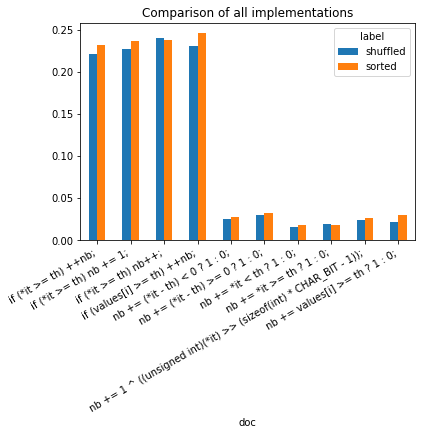

In [10]:
ax = dfg.plot.bar(rot=30)
labels = [l.get_text() for l in ax.get_xticklabels()]
ax.set_xticklabels(labels, ha='right')
ax.set_title("Comparison of all implementations");

It seems that inline tests (``cond ? value1 : value2``) do not stop the branching and it should be used whenever possible.

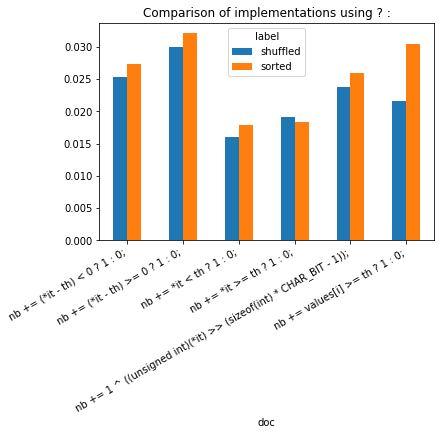

In [11]:
sdf = df[["doc", "label", "average"]]
dfg2 = sdf[sdf.doc.str.contains('[?^]')].pivot("doc", "label", "average")
ax = dfg2.plot.bar(rot=30)
labels = [l.get_text() for l in ax.get_xticklabels()]
ax.set_xticklabels(labels, ha='right')
ax.set_title("Comparison of implementations using ? :");

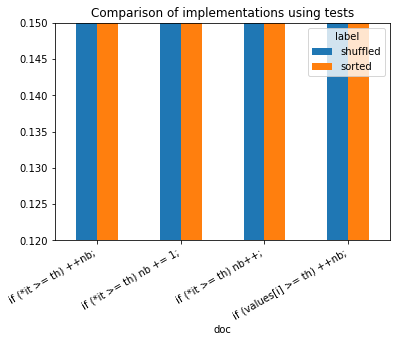

In [12]:
sdf = df[["doc", "label", "average"]]
dfg2 = sdf[sdf.doc.str.contains('if')].pivot("doc", "label", "average")
ax = dfg2.plot.bar(rot=30)
labels = [l.get_text() for l in ax.get_xticklabels()]
ax.set_xticklabels(labels, ha='right')
ax.set_ylim([0.12, 0.15])
ax.set_title("Comparison of implementations using tests");

*sorted*, *not sorted* does not seem to have a real impact in this case. It shows *branching* really slows down the execution of a program. Branching happens whenever the program meets a loop condition or a test. Iterator ``*it`` are faster than accessing an array with notation ``[i]`` which adds a cost due to an extra addition.

## Second experiment: dot product

The goal is to compare the dot product from [numpy.dot](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.dot.html) and a couple of implementation in C++ which look like this:

In [13]:
# float vector_dot_product_pointer(const float *p1, const float *p2, size_t size)
# {
#     float sum = 0;
#     const float * end1 = p1 + size;
#     for(; p1 != end1; ++p1, ++p2)
#         sum += *p1 * *p2;
#     return sum;
# }
# 
# 
# float vector_dot_product(py::array_t<float> v1, py::array_t<float> v2)
# {
#     if (v1.ndim() != v2.ndim())
#         throw std::runtime_error("Vector v1 and v2 must have the same dimension.");
#     if (v1.ndim() != 1)
#         throw std::runtime_error("Vector v1 and v2 must be vectors.");
#     return vector_dot_product_pointer(v1.data(0), v2.data(0), v1.shape(0));
# }

### numpy vs C++

In [14]:
%matplotlib inline

In [15]:
import numpy

def simple_dot(values):
    return numpy.dot(values, values)

values = list(range(10000000))
values = numpy.array(values, dtype=numpy.float32)
vect = values / numpy.max(values)
simple_dot(vect)

3333333.2

In [16]:
vect.dtype

dtype('float32')

In [17]:
from timeit import Timer

def measure_time(stmt, context, repeat=10, number=50):
    tim = Timer(stmt, globals=context)
    res = numpy.array(tim.repeat(repeat=repeat, number=number))
    mean = numpy.mean(res)
    dev = numpy.mean(res ** 2)
    dev = (dev - mean**2) ** 0.5
    return dict(average=mean, deviation=dev, min_exec=numpy.min(res),
                max_exec=numpy.max(res), repeat=repeat, number=number,
                size=context['values'].shape[0])

measure_time("simple_dot(values)", context=dict(simple_dot=simple_dot, values=vect))

{'average': 0.10960725769999939,
 'deviation': 0.009791505828729877,
 'min_exec': 0.0980233900000016,
 'max_exec': 0.13245613899999853,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [18]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("simple_dot(values)", repeat=100,
                     context=dict(simple_dot=simple_dot, values=vect[:i].copy()))
    res.append(t)

import pandas
dot = pandas.DataFrame(res)
dot.tail()

,average,deviation,max_exec,min_exec,number,repeat,size
75,0.001379,0.000393,0.002078,0.000698,50,100,187510
76,0.001346,0.000370,0.002138,0.000739,50,100,190010
77,0.001258,0.000453,0.003655,0.000717,50,100,192510
78,0.001266,0.000328,0.002162,0.000718,50,100,195010
79,0.001275,0.000409,0.002147,0.000710,50,100,197510


In [19]:
res = []
for i in range(100000, 10000000, 1000000):
    t = measure_time("simple_dot(values)", repeat=10,
                     context=dict(simple_dot=simple_dot, values=vect[:i].copy()))
    res.append(t)
    
huge_dot = pandas.DataFrame(res)
huge_dot.head()

,average,deviation,max_exec,min_exec,number,repeat,size
0,0.000836,0.000424,0.001839,0.000463,50,10,100000
1,0.009560,0.001804,0.013420,0.007048,50,10,1100000
2,0.019643,0.001888,0.024444,0.017707,50,10,2100000
3,0.031583,0.002120,0.034261,0.027143,50,10,3100000
4,0.043053,0.001436,0.044908,0.040308,50,10,4100000


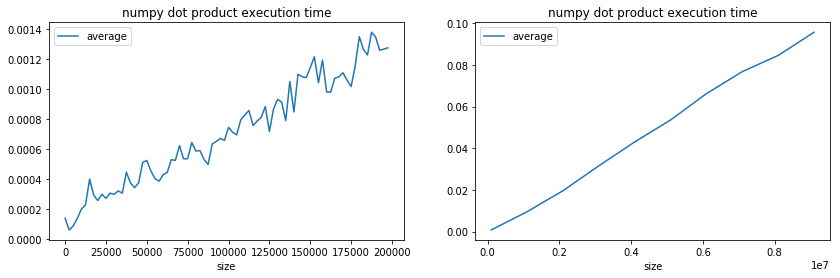

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0])
huge_dot.plot(x='size', y="average", ax=ax[1])
ax[0].set_title("numpy dot product execution time");
ax[1].set_title("numpy dot product execution time");

Now the custom implementation. We start with an empty function to get a sense of the cost due to to pybind11.

In [21]:
from cpyquickhelper.numbers.cbenchmark import empty_vector_dot_product
empty_vector_dot_product(vect, vect)

0.0

In [22]:
def empty_c11_dot(vect):
    return empty_vector_dot_product(vect, vect)

measure_time("empty_c11_dot(values)", context=dict(empty_c11_dot=empty_c11_dot, values=vect), repeat=10)

{'average': 0.00017781689999765148,
 'deviation': 4.814660425537415e-05,
 'min_exec': 0.00012286400000505182,
 'max_exec': 0.00026548099999956776,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

Very small. It should not pollute our experiments.

In [23]:
from cpyquickhelper.numbers.cbenchmark import vector_dot_product
vector_dot_product(vect, vect)

3334629.0

In [24]:
def c11_dot(vect):
    return vector_dot_product(vect, vect)

measure_time("c11_dot(values)", context=dict(c11_dot=c11_dot, values=vect), repeat=10)

{'average': 1.3240202779,
 'deviation': 0.058382436386826914,
 'min_exec': 1.280620309999989,
 'max_exec': 1.4856733009999914,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [25]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("c11_dot(values)", repeat=10,
                     context=dict(c11_dot=c11_dot, values=vect[:i].copy()))
    res.append(t)

import pandas
cus_dot = pandas.DataFrame(res)
cus_dot.tail()

,average,deviation,max_exec,min_exec,number,repeat,size
75,0.023701,0.003035,0.032525,0.021838,50,10,187510
76,0.022079,0.001002,0.023346,0.020411,50,10,190010
77,0.020766,0.001118,0.022268,0.018937,50,10,192510
78,0.021499,0.002028,0.023583,0.016703,50,10,195010
79,0.028812,0.006735,0.037476,0.020805,50,10,197510


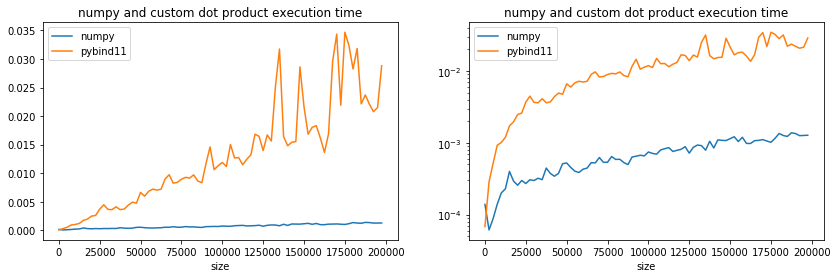

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0], label="numpy")
cus_dot.plot(x='size', y="average", ax=ax[0], label="pybind11")
dot.plot(x='size', y="average", ax=ax[1], label="numpy", logy=True)
cus_dot.plot(x='size', y="average", ax=ax[1], label="pybind11")
ax[0].set_title("numpy and custom dot product execution time");
ax[1].set_title("numpy and custom dot product execution time");

Pretty slow. Let's see what it does to compute dot product 16 by 16.

### Use of branching: 16 multplications in one row

The code looks like what follows. If there is more than 16 multiplications left, we use function *vector_dot_product_pointer16*, otherwise, there are done one by one like the previous function.

In [27]:
# float vector_dot_product_pointer16(const float *p1, const float *p2)
# {
#     float sum = 0;
#     
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
# 
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
#     sum += *(p1++) * *(p2++);
# 
#     return sum;
# }
# 
# #define BYN 16
# 
# float vector_dot_product_pointer16(const float *p1, const float *p2, size_t size)
# {
#     float sum = 0;
#     size_t i = 0;
#     if (size >= BYN) {
#         size_t size_ = size - BYN;
#         for(; i < size_; i += BYN, p1 += BYN, p2 += BYN)
#             sum += vector_dot_product_pointer16(p1, p2);
#     }
#     for(; i < size; ++p1, ++p2, ++i)
#         sum += *p1 * *p2;
#     return sum;
# }
# 
# float vector_dot_product16(py::array_t<float> v1, py::array_t<float> v2)
# {
#     if (v1.ndim() != v2.ndim())
#         throw std::runtime_error("Vector v1 and v2 must have the same dimension.");
#     if (v1.ndim() != 1)
#         throw std::runtime_error("Vector v1 and v2 must be vectors.");
#     return vector_dot_product_pointer16(v1.data(0), v2.data(0), v1.shape(0));
# }

In [28]:
from cpyquickhelper.numbers.cbenchmark import vector_dot_product16
vector_dot_product16(vect, vect)

3333331.75

In [29]:
def c11_dot16(vect):
    return vector_dot_product16(vect, vect)

measure_time("c11_dot16(values)", context=dict(c11_dot16=c11_dot16, values=vect), repeat=10)

{'average': 0.6178078207999989,
 'deviation': 0.07956237060790541,
 'min_exec': 0.5459272539999915,
 'max_exec': 0.7690416570000025,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [30]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("c11_dot16(values)", repeat=10,
                     context=dict(c11_dot16=c11_dot16, values=vect[:i].copy()))
    res.append(t)

cus_dot16 = pandas.DataFrame(res)
cus_dot16.tail()

,average,deviation,max_exec,min_exec,number,repeat,size
75,0.010881,0.000902,0.012416,0.009261,50,10,187510
76,0.010263,0.001520,0.012274,0.007016,50,10,190010
77,0.010901,0.000928,0.012427,0.009209,50,10,192510
78,0.010424,0.001379,0.012528,0.008146,50,10,195010
79,0.011165,0.000506,0.011727,0.009829,50,10,197510


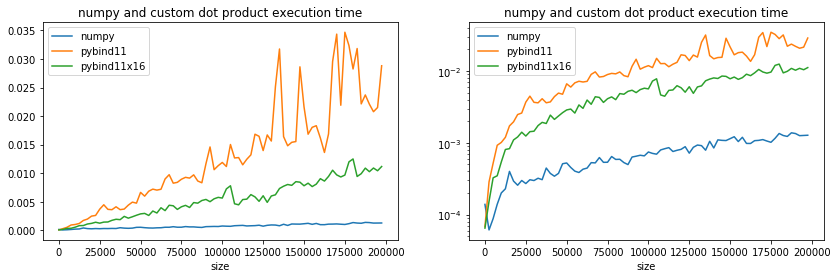

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0], label="numpy")
cus_dot.plot(x='size', y="average", ax=ax[0], label="pybind11")
cus_dot16.plot(x='size', y="average", ax=ax[0], label="pybind11x16")
dot.plot(x='size', y="average", ax=ax[1], label="numpy", logy=True)
cus_dot.plot(x='size', y="average", ax=ax[1], label="pybind11")
cus_dot16.plot(x='size', y="average", ax=ax[1], label="pybind11x16")
ax[0].set_title("numpy and custom dot product execution time");
ax[1].set_title("numpy and custom dot product execution time");

We are far from *numpy* but the branching has clearly a huge impact and the fact the loop condition is evaluated only every 16 iterations does not explain this gain. Next experiment with [SSE](https://fr.wikipedia.org/wiki/Streaming_SIMD_Extensions) instructions.

### SSE instructions

We replace one function in the previous implementation.

In [32]:
# #include <xmmintrin.h>
# 
# float vector_dot_product_pointer16_sse(const float *p1, const float *p2)
# {
#     __m128 c1 = _mm_load_ps(p1);
#     __m128 c2 = _mm_load_ps(p2);
#     __m128 r1 = _mm_mul_ps(c1, c2);
#     
#     p1 += 4;
#     p2 += 4;
#     
#     c1 = _mm_load_ps(p1);
#     c2 = _mm_load_ps(p2);
#     r1 = _mm_add_ps(r1, _mm_mul_ps(c1, c2));
#     
#     p1 += 4;
#     p2 += 4;
#     
#     c1 = _mm_load_ps(p1);
#     c2 = _mm_load_ps(p2);
#     r1 = _mm_add_ps(r1, _mm_mul_ps(c1, c2));
#     
#     p1 += 4;
#     p2 += 4;
#     
#     c1 = _mm_load_ps(p1);
#     c2 = _mm_load_ps(p2);
#     r1 = _mm_add_ps(r1, _mm_mul_ps(c1, c2));
# 
#     float r[4];
#     _mm_store_ps(r, r1);
# 
#     return r[0] + r[1] + r[2] + r[3];
# }

In [33]:
from cpyquickhelper.numbers.cbenchmark import vector_dot_product16_sse
vector_dot_product16_sse(vect, vect)

3333332.0

In [34]:
def c11_dot16_sse(vect):
    return vector_dot_product16_sse(vect, vect)

measure_time("c11_dot16_sse(values)", context=dict(c11_dot16_sse=c11_dot16_sse, values=vect), repeat=10)

{'average': 0.24736780550000076,
 'deviation': 0.06380890352861066,
 'min_exec': 0.19131710599999963,
 'max_exec': 0.41758291300000394,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [35]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("c11_dot16_sse(values)", repeat=10,
                     context=dict(c11_dot16_sse=c11_dot16_sse, values=vect[:i].copy()))
    res.append(t)

cus_dot16_sse = pandas.DataFrame(res)
cus_dot16_sse.tail()

,average,deviation,max_exec,min_exec,number,repeat,size
75,0.002755,0.000403,0.003298,0.002152,50,10,187510
76,0.003343,0.000414,0.003774,0.002473,50,10,190010
77,0.003279,0.000374,0.003748,0.002449,50,10,192510
78,0.003807,0.000033,0.003892,0.003755,50,10,195010
79,0.003576,0.000380,0.003883,0.002724,50,10,197510


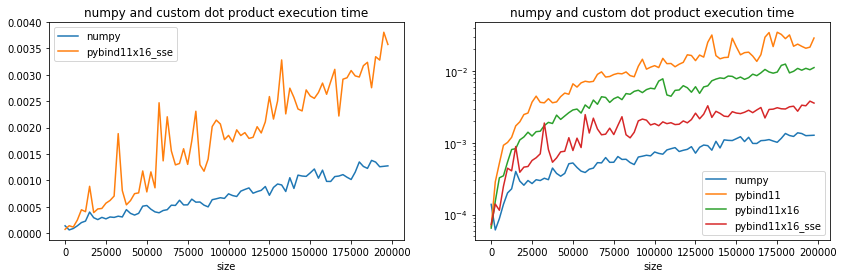

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0], label="numpy")
cus_dot16_sse.plot(x='size', y="average", ax=ax[0], label="pybind11x16_sse")
dot.plot(x='size', y="average", ax=ax[1], label="numpy", logy=True)
cus_dot.plot(x='size', y="average", ax=ax[1], label="pybind11")
cus_dot16.plot(x='size', y="average", ax=ax[1], label="pybind11x16")
cus_dot16_sse.plot(x='size', y="average", ax=ax[1], label="pybind11x16_sse")
ax[0].set_title("numpy and custom dot product execution time");
ax[1].set_title("numpy and custom dot product execution time");

Better even though it is still 4 times slower than *numpy*. Maybe the compilation option are not optimized, *numpy* was also compiled with the Intel compiler.

### AVX 512

Last experiment with [AVX 512](https://fr.wikipedia.org/wiki/Advanced_Vector_Extensions) instructions but it does not work on all processor. I could not test it on my laptop as these instructions do not seem to be available. More can be found on wikipedia [CPUs with AVX-512](https://en.wikipedia.org/wiki/AVX-512#CPUs_with_AVX-512).

In [37]:
import platform
platform.processor()

'Intel64 Family 6 Model 78 Stepping 3, GenuineIntel'

In [38]:
import numpy
values = numpy.array(list(range(10000000)), dtype=numpy.float32)
vect = values / numpy.max(values)

In [39]:
from cpyquickhelper.numbers.cbenchmark import vector_dot_product16_avx512
vector_dot_product16_avx512(vect, vect)

3333332.0

In [40]:
def c11_dot16_avx512(vect):
    return vector_dot_product16_avx512(vect, vect)

measure_time("c11_dot16_avx512(values)",
             context=dict(c11_dot16_avx512=c11_dot16_avx512, values=vect), repeat=10)

{'average': 0.21697349130000135,
 'deviation': 0.021736046356677072,
 'min_exec': 0.19436421499999312,
 'max_exec': 0.2719024929999989,
 'repeat': 10,
 'number': 50,
 'size': 10000000}

In [41]:
res = []
for i in range(10, 200000, 2500):
    t = measure_time("c11_dot16_avx512(values)", repeat=10,
                     context=dict(c11_dot16_avx512=c11_dot16_avx512, values=vect[:i].copy()))
    res.append(t)

cus_dot16_avx512 = pandas.DataFrame(res)
cus_dot16_avx512.tail()

,average,deviation,max_exec,min_exec,number,repeat,size
75,0.003758,0.000065,0.003904,0.003653,50,10,187510
76,0.003378,0.000532,0.003885,0.002324,50,10,190010
77,0.002657,0.000385,0.003489,0.002178,50,10,192510
78,0.003085,0.000520,0.003826,0.002298,50,10,195010
79,0.003253,0.000562,0.004096,0.002412,50,10,197510


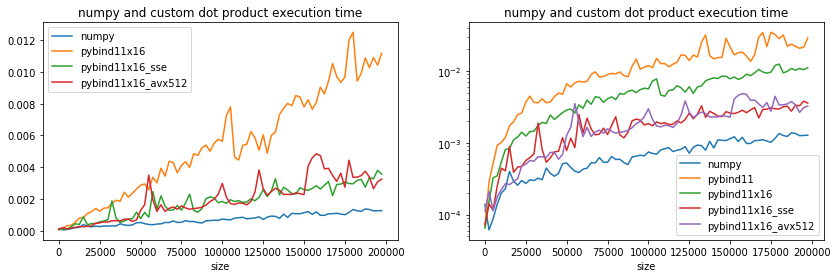

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
dot.plot(x='size', y="average", ax=ax[0], label="numpy")
cus_dot16.plot(x='size', y="average", ax=ax[0], label="pybind11x16")
cus_dot16_sse.plot(x='size', y="average", ax=ax[0], label="pybind11x16_sse")
cus_dot16_avx512.plot(x='size', y="average", ax=ax[0], label="pybind11x16_avx512")
dot.plot(x='size', y="average", ax=ax[1], label="numpy", logy=True)
cus_dot.plot(x='size', y="average", ax=ax[1], label="pybind11")
cus_dot16.plot(x='size', y="average", ax=ax[1], label="pybind11x16")
cus_dot16_sse.plot(x='size', y="average", ax=ax[1], label="pybind11x16_sse")
cus_dot16_avx512.plot(x='size', y="average", ax=ax[1], label="pybind11x16_avx512")
ax[0].set_title("numpy and custom dot product execution time");
ax[1].set_title("numpy and custom dot product execution time");

If the time is the same, it means that options AVX512 are not available.

In [43]:
from cpyquickhelper.numbers.cbenchmark import get_simd_available_option
get_simd_available_option()

'Available options:  __SSE__ __SSE2__ __SSE3__ __SSE4_1__'

### Back to numpy

This article [Why is matrix multiplication faster with numpy than with ctypes in Python?](https://stackoverflow.com/questions/10442365/why-is-matrix-multiplication-faster-with-numpy-than-with-ctypes-in-python) gives some kints on why *numpy* is still faster. By looking at the code of the dot product in *numpy*: [arraytypes.c.src](https://github.com/numpy/numpy/blob/master/numpy/core/src/multiarray/arraytypes.c.src), it seems that *numpy* does a simple dot product without using branching or uses the library [BLAS](http://www.netlib.org/blas/) which is the case in this benchmark (code for dot product: [sdot.c](http://www.netlib.org/clapack/cblas/sdot.c)). And it does use *branching*. See also function [blas_stride](https://github.com/numpy/numpy/blob/master/numpy/core/src/multiarray/common.h#L298). These libraries then play with [compilation options](https://gcc.gnu.org/onlinedocs/gcc/Optimize-Options.html) and optimize for speed.